In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Datasets/eye/dataset.zip'

In [ ]:
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')


/content/fold 1/train/mild/30941b65348b.png


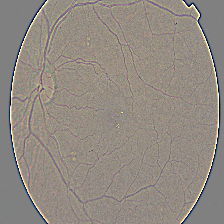

In [ ]:
from pathlib import Path
import PIL

data_dir = '/content/fold 1/train/'
path_object = Path(data_dir)
mild = list(path_object.glob('mild/*'))
print(mild[0])
PIL.Image.open(str(mild[0]))

In [ ]:
import keras
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)


94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/fold 1/train',
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/fold 1/test',
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical'
)


Found 2929 images belonging to 5 classes.
Found 733 images belonging to 5 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=40,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


<ipython-input-12-ee2587867e71>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/40
46/46 [==============================] - 25s 354ms/step - loss: 1.0480 - accuracy: 0.6924 - val_loss: 0.6940 - val_accuracy: 0.7503
Epoch 2/40
46/46 [==============================] - 12s 265ms/step - loss: 0.6416 - accuracy: 0.7719 - val_loss: 0.7297 - val_accuracy: 0.7040
Epoch 3/40
46/46 [==============================] - 12s 259ms/step - loss: 0.6123 - accuracy: 0.7781 - val_loss: 0.6412 - val_accuracy: 0.7735
Epoch 4/40
46/46 [==============================] - 12s 259ms/step - loss: 0.5482 - accuracy: 0.7965 - val_loss: 0.6524 - val_accuracy: 0.7285
Epoch 5/40
46/46 [==============================] - 12s 259ms/step - loss: 0.5418 - accuracy: 0.7982 - val_loss: 0.6560 - val_accuracy: 0.7708
Epoch 6/40
46/46 [==============================] - 12s 260ms/step - loss: 0.5318 - accuracy: 0.8040 - val_loss: 0.6335 - val_accuracy: 0.7544
Epoch 7/40
46/46 [==============================] - 14s 309ms/step - loss: 0.5293 - accuracy: 0.7989 - val_loss: 0.6774 - val_accuracy: 0.7258

In [ ]:
model.save('resnet50_image_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.preprocessing import image
import numpy as np
# Load the image
img_path = '/content/fold 1/test/severe/5b3e7197ac1c.png'
img = image.load_img(img_path, target_size=(180, 180))  # Same size as your model input

# Convert to array and preprocess
x = image.img_to_array(img)
x = preprocess_input(x)  # Use the same preprocessing function as during training

# Add an extra dimension for batch processing
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
predicted_class_index = np.argmax(prediction)
print(prediction)
print(predicted_class_index)

1/1 [==============================] - 0s 22ms/step
[[1.5860183e-02 1.6600768e-01 4.7024649e-05 8.1750852e-01 5.7652878e-04]]
3


In [ ]:
import pandas as pd
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']


# Add 1 to each index as there is no 0 epoch
epoch = [i + 1 for i in range(len(train_acc))]

# Create Dataframe consisting the train / validation loss and accuracy of each epoch along with its corresponding epoch
acc_loss_df = pd.DataFrame({'Train Accuracy' : train_acc,
                            'Train Loss' : train_loss,
                            'Validation Accuracy' : val_acc,
                            'Validation Loss' : val_loss,
                            'Epoch' : epoch})

acc_loss_df.tail(10)

,Train Accuracy,Train Loss,Validation Accuracy,Validation Loss,Epoch
30,0.942301,0.157418,0.785812,0.778123,31
31,0.960055,0.127379,0.793997,0.820071,32
32,0.955958,0.131448,0.791269,0.865444,33
33,0.966883,0.117571,0.781719,0.789741,34
34,0.964152,0.118427,0.763984,0.854831,35
35,0.960055,0.122414,0.758527,0.938842,36
36,0.954251,0.134139,0.785812,0.819901,37
37,0.972687,0.099831,0.761255,0.828621,38
38,0.964834,0.112004,0.776262,0.814943,39
39,0.978150,0.082601,0.747613,0.876688,40


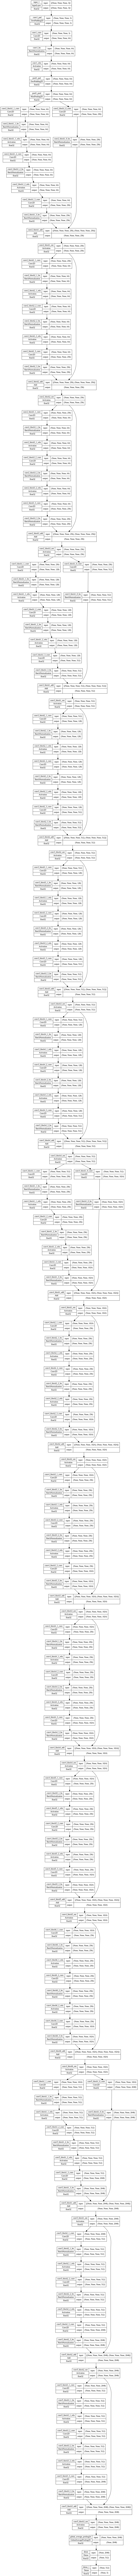

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(model,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

In [ ]:
import plotly
from plotly.graph_objs import Scatter
import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Train Accuracy'],
                         mode = 'lines+markers',
                         name = 'Train Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Validation Accuracy'],
                         mode = 'lines+markers',
                         name = 'Validation Accuracy'))

fig.update_layout(title = {'text' : '<b>Training Accuracy Vs Validation Accuracy</b>',
                           'xanchor' : 'center',
                           'yanchor' : 'top',
                           'x' : 0.5},
                          xaxis_title = 'Epoch',
                          yaxis_title = 'Accuracy',
                          title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'
fig.show()

fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Train Loss'],
                         mode = 'lines+markers',
                         name = 'Train Loss'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Validation Loss'],
                         mode = 'lines+markers',
                         name = 'Validation Loss'))

fig.update_layout(title = {'text' : '<b>Training Loss Vs Validation Loss</b>',
                           'xanchor' : 'center',
                           'yanchor' : 'top',
                           'x' : 0.5},
                          xaxis_title = 'Epoch',
                          yaxis_title = 'Loss',
                          title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()